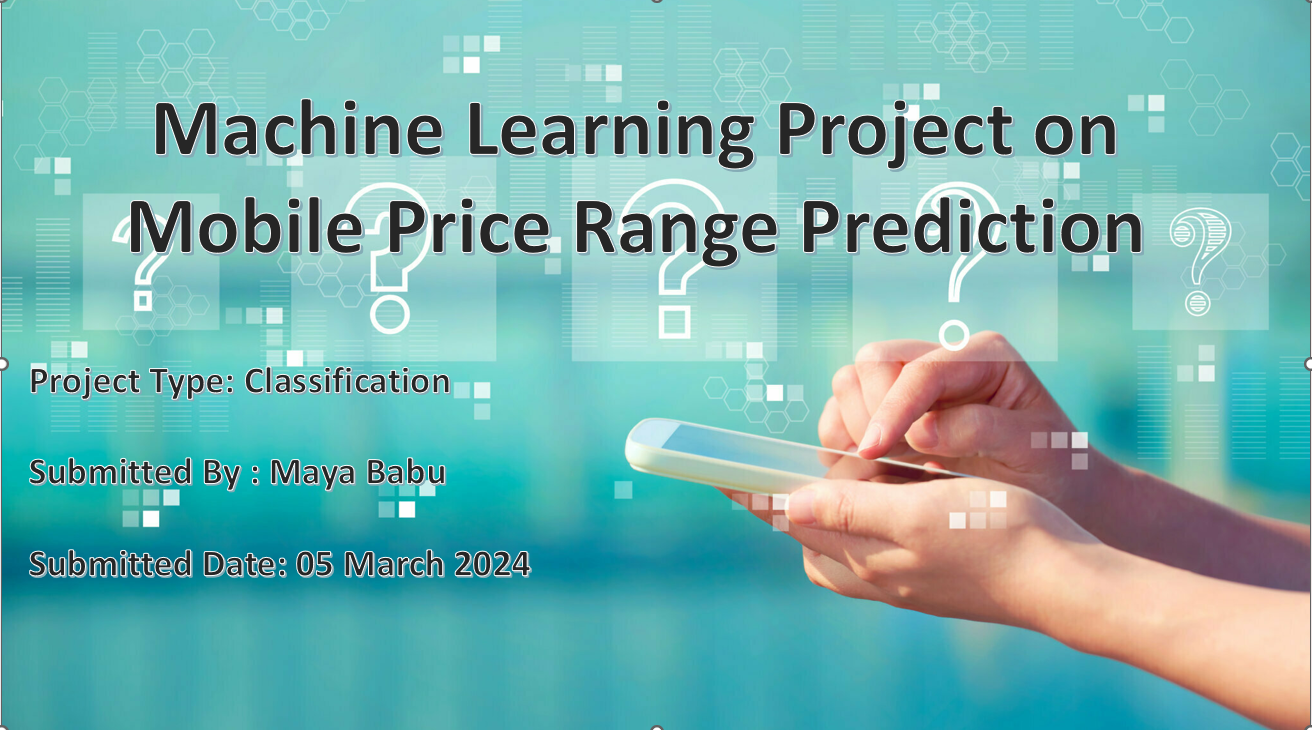

# Executive Summary 

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price.The main goal of this project is to develop a comprehensive understanding of the mobile phone market dynamics, with a specific focus on the relationship between key features of mobile devices and their associated price ranges.I will be learning and using key components like: Exploratory Data Analysis, Data Preprocessing, Feature engineering, making predictions with Classification model (Machine Learning) and Evaluation. Ultimately, our project will offer a clear understanding of the dataset, efficient data preparation, a well-selected machine learning algorithm, and a comprehensive evaluation process.



## Problem Statement

This project aims to perform an efficient Exploratory Data Analysis (EDA) to gain insights into a dataset and prepare it for machine learning training. I will focus on understanding the data preprocessing techniques required to make the dataset ready for model training, paying particular attention to the target feature and its distribution. Additionally, will assess the target feature for class imbalance and address this issue appropriately during modeling.

The core of the project involves selecting the most suitable machine learning algorithm for the given dataset. I will evaluate various algorithms and choose the one that best fits the data, all while considering the impact of class imbalance on model performance. To ensure the robustness of the model, I will implement an evaluation strategy that takes class imbalance into account. This will involve the use of appropriate metrics and techniques to assess the model's performance accurately. I will use ML models like :

1. Logistic Regression

2. Random Forest Classifier

3. Decision Tree

4. K-Nearest Neighbor

5. Support Vector Machines Classifier

6. XGBoost Classifier

**Steps involved in building a ML Model:**

> Step 1: Data gathering and Understanding

> Step 2: Data preparation

> Step 3: Data Cleaning

> Step 4: Exploratory data analysis

> Step 5: Feature engineering and selection

> Step 6: ML Model assumption and checks

> Step 7: Data preparation for modelling

> Step 8: Model Building

> Step 9: Model Validation & Evaluation

> Step 10: Predictions & Saving model.


**Libraries used in EDA & Machine Learning:**
1. Pandas
2. Numpy
3. Matplotib
4. Seaborn
5. Plotly
6. Sklearn
7. Scipy


**Graphs used for representation:**
1. Bar plot
2. Pie plot
3. Box Plot
4. Grouped bar plot
5. Donut plot
6. Heatmap
7. Pair plot


**ML Models used for training & testing:**
1. Logistic Regression
2. KNN Classifier
3. Random Forest Classifier
4. XG Boost Classifier
5. Light GBM Classifier
6. CatBoost Classifier
7. SVM Classifier

**Insights from EDA impacting business:**

* Phones which are not having 3G don't have 4G connectivity as well.

* Phones which are not having Primary cam don't have front cam as well.

* Low price phones mostly fall under Rambin 1GB & very high cost phones fall under rambin of 3GB to 4GB.

* Very high cost phones have larger screen area & pixel area as well, resulting in better screen quality.

* Very high cost phones have larger battery size & mobile weight is lowest.


### Import Libraries

In [1]:
# Import Libraries

# Standard Libraries import for data handling and manipulation of dataset
import numpy as np
import pandas as pd
from numpy import math

#For visualization purpose
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


#For hypothesis testing
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn import svm

#For metric score calculation
from sklearn.metrics import confusion_matrix, classification_report

#For finding best model and hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Model saving
import pickle

#Time remaining
from time import sleep
from tqdm import tqdm

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#For printing all the rows & columns in pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Dataset Loading

In [3]:
dataset=pd.read_csv('data_mobile_price_range.csv')

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dataset.shape

(2000, 21)

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].count()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There is no duplicated values

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


There is no missing values

### Understanding the Variables

In [9]:
# Dataset Columns
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
# Dataset Describe
dataset.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

### Variables Description 

* **Battery_power** - Battery capacity in mAh
* **Blue** - Has bluetooth or not
* **Clock_speed** - speed at which microprocessor executes instructions
* **Dual_sim** - Has dual sim support or not
* **Fc** - Front Camera Megapixels
* **Four_g** - Has 4G or not
* **Int_memory** - Internal Memory capacity
* **M_dep** - Mobile Depth in cm
* **Mobile_wt** - Weight of mobile phone
* **N_cores** - Number of cores in processor
* **Pc** - Primary Camera Megapixels
* **Px_heigh** - Pixel Resolution Height
* **Px_width** - Pixel Resolution Width
* **Ram** - Random Access Memory in MB
* **Touch_screen** - Has touch screen or not
* **Wifi** - Has wifi or not
* **Sc_h** - Screen Height in cm
* **Sc_w** - Screen Width in cm
* **Talk_time** - Longest time that a single battery charge will last over a call
* **Three_g** - Has 3G or not
* **Price_range** - This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost).

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for col in dataset.columns:
    unique_values = dataset[col].unique()
    print(f"Unique values for {col}:\n{unique_values}\n")

Unique values for battery_power:
[ 842 1021  563 ... 1139 1467  858]

Unique values for blue:
[0 1]

Unique values for clock_speed:
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

Unique values for dual_sim:
[0 1]

Unique values for fc:
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

Unique values for four_g:
[0 1]

Unique values for int_memory:
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

Unique values for m_dep:
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

Unique values for mobile_wt:
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 13

### ***Data Wrangling***

In [12]:
# Creating a copy of dataset for data wrangling 
df = dataset.copy()

In [13]:
# Checking rows having zero values in pixel height
df[df['px_height']== 0].shape

(2, 21)

In [14]:
# Replacing zero values in pixel height with mean
df['px_height'] = df['px_height'].replace(0,df['px_height'].mean())

In [15]:
# Checking rows having zero values in screen width
df[df['sc_w']== 0].shape

(180, 21)

In [16]:
# Replacing zero values in screen width with mean
df['sc_w'] = df['sc_w'].replace(0,df['sc_w'].mean())

In [17]:
# Checking phones in each price range
price_range = df['price_range'].value_counts().reset_index().rename(columns={'index':'price_range','price_range':'counts'})
price_range

counts  count
0       1    500
1       2    500
2       3    500
3       0    500

In [18]:
# Checking phones having bluetooth
bluetooth = df.groupby(['price_range','blue'])['blue'].count().unstack()
bluetooth

blue           0    1
price_range          
0            257  243
1            255  245
2            257  243
3            241  259

In [19]:
# Checking phones having 4G connectivity
four_g_avalibility=df['four_g'].value_counts().reset_index().rename(columns= {'index':'4G','four_g':'counts'})
four_g_avalibility

counts  count
0       1   1043
1       0    957

In [20]:
# Checking phones having 3G connectivity
three_g_avalibility=df['three_g'].value_counts().reset_index().rename(columns= {'index':'3G','three_g':'counts'})
three_g_avalibility

counts  count
0       1   1523
1       0    477

In [21]:
# Checking phones having wifi connectivity
wifi = df['wifi'].value_counts().reset_index().rename(columns= {'index':'wifi','wifi':'counts'})
wifi

counts  count
0       1   1014
1       0    986

In [22]:
# Checking 4G & Wifi connectivity in phones according to price range
wifi_4g=df.groupby(['price_range'])[['four_g','wifi']].sum()
wifi_4g

four_g  wifi
price_range              
0               259   248
1               262   252
2               247   252
3               275   262

In [23]:
# Creating new variables 'screen_area' & 'px_area'
df['screen_area'] = df['sc_h'] * df['sc_w']
df['px_area'] = df['px_height'] * df['px_width']

In [24]:
# Average pixel area according to price range
pd.options.display.float_format = '{:.2f}'.format
df.groupby('price_range')['px_area'].mean().reset_index()

price_range    px_area
0            0  678837.80
1            1  931516.54
2            2  880749.47
3            3 1133782.54

In [25]:
# Checking phones having no front cam according to price range
no_fc = df[df['fc']== 0].groupby('price_range')['fc'].count().reset_index()
no_fc

price_range   fc
0            0  121
1            1  124
2            2  121
3            3  108

In [26]:
# Creating new boolean variables weather phones are having camera or not
df1 = df.copy()
df1['no_fc'] = df1['fc'].apply(lambda x: x if x == 0 else 1)
df1['no_pc'] = df1['pc'].apply(lambda x: x if x == 0 else 1)

In [27]:
# Checking relation between 4G & 3G
df.groupby(['three_g','four_g'])['three_g'].count().unstack()

four_g       0       1
three_g               
0       477.00     NaN
1       480.00 1043.00

In [28]:
# Function for checking relation between price range & other boolean variables
def price_range_and(a):
  return df.groupby(['price_range',a])[a].count().unstack()

In [29]:
# Checking relation between price range & touch screen
price_range_and('touch_screen')

touch_screen    0    1
price_range           
0             238  262
1             239  261
2             265  235
3             252  248

In [30]:
# Checking relation between price range & wifi
price_range_and('wifi')

wifi           0    1
price_range          
0            252  248
1            248  252
2            248  252
3            238  262

In [31]:
# Checking relation between price range & 3G
price_range_and('three_g')

three_g        0    1
price_range          
0            127  373
1            122  378
2            113  387
3            115  385

In [32]:
# Checking relation between price range & 4G
price_range_and('four_g')

four_g         0    1
price_range          
0            241  259
1            238  262
2            253  247
3            225  275

In [33]:
# Checking relation between price range & bluetooth
price_range_and('blue')

blue           0    1
price_range          
0            257  243
1            255  245
2            257  243
3            241  259

In [34]:
# Checking relation between price range & dual sim
price_range_and('dual_sim')

dual_sim       0    1
price_range          
0            250  250
1            245  255
2            251  249
3            235  265

In [35]:
# Checking phones having no primary cam according to price range
no_pc = df[df['pc']== 0].groupby('price_range')['pc'].count().reset_index()
no_pc

price_range  pc
0            0  33
1            1  27
2            2  20
3            3  21

In [36]:
# Checking average Screen Area, Mobile Weight, Battery Power according to price range
features_by_pricerange = df.groupby(['price_range'])[['screen_area', 'mobile_wt', 'battery_power']].mean()
features_by_pricerange

screen_area  mobile_wt  battery_power
price_range                                       
0                  84.76     140.55        1116.90
1                  82.78     140.51        1228.87
2                  82.58     143.61        1228.32
3                  92.70     136.32        1379.98

In [37]:
# Creating bins of ram in-range of 1GB to 4GB
df1=df.copy()
df1['rambin'] = pd.cut(df1['ram'],[0,1024,2048,3072,4096])
df1['rambin'].value_counts()

rambin
(2048, 3072]    555
(1024, 2048]    542
(3072, 4096]    497
(0, 1024]       406
Name: count, dtype: int64

In [38]:
# Phone distribution in Rambin vs Price range
ram_vs_pr=df1.groupby(['rambin','price_range'])['price_range'].count().unstack()
ram_vs_pr

price_range     0    1    2    3
rambin                          
(0, 1024]     371   35    0    0
(1024, 2048]  129  347   66    0
(2048, 3072]    0  118  352   85
(3072, 4096]    0    0   82  415

### Data manipulations and insights found out

* 2 values in 'Pixel_height' are 0 which are outliers, so it is replaced with mean value.

* There are 180 values in 'Screen_width' are 0 which are outliers, so I replaced it with mean value.

* Created a new feature 'Pixel_area' by multiplying 'Pixel_height' & 'Pixel_width'.

* Created a new feature 'Screen_area' by multiplying 'Screen_height' & 'Screen_width'.

* Created new features for front & primary cam for indicating presence of camera by taking all the values above 0 as 1.

* Created 4 rambins ranging from 1GB to 4GB to check the distribution of ram in different price range.

* Phones not having 3G are not having 4G connectivity as well.

* Low price phones mostly fall under Rambin 1GB & high cost phones under rambin of 3GB to 4GB.

* Very high cost phones have larger screen area & battery size where as weight is lowest.

* Phones which are not having Primary cam don't have front cam as well.

## Exploratory Data Analysis

In [39]:
# creating a function to plot histogram.
def BarPlot(a,height,width):
  fig = px.histogram(df, x=a,color=a,height=height,width=width)
  fig.update_layout(bargap=0.2)
  fig.show()

In [40]:
# creating a function to plot barplots with dependent variable.
def Bivarite_barplot(a,height,width):
  y=df.groupby(['price_range'])[a].mean().reset_index()
  fig = px.bar(y, x='price_range',y=a,title=a +' by price range',color=a, height=height,width=width)
  fig.show()

#### Chart - 1

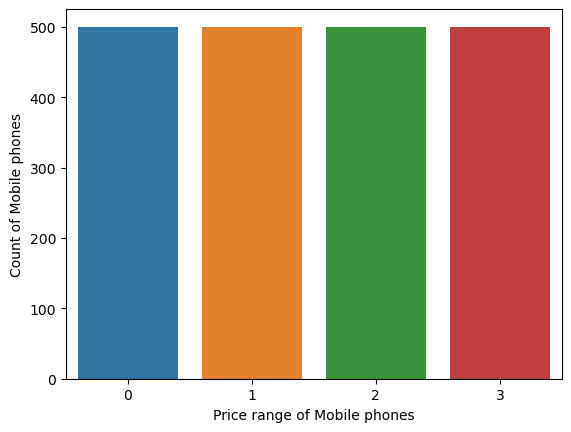

In [41]:
# Chart - 1 visualizing price range count
sns.countplot(data=df, x='price_range')
plt.xlabel('Price range of Mobile phones')
plt.ylabel('Count of Mobile phones')
plt.show()

From the above graph it is clear that there are 4 categories in mobile price range '0', '1', '2', '3' defining 'low', 'medium', 'high' and 'very high' ranges for mobile phones. Count is equal for all categories i.e. '500' count in each, summed up to 2000 in total.

#### Chart - 2

In [42]:
# Checking phones having bluetooth
BarPlot("blue",height=500,width=600)


> Almost 50% phones are having bluetooth connectivity.

#### Chart - 3

In [43]:
# Checking  phones having dual sim
BarPlot('dual_sim',height=500,width=600)

> Almost 50% phones are having dual sim. Dual sim is luxury to have as increasing prices makes unaffordable for many to maintain 2 sim cards.

#### Chart - 4

In [44]:
# Checking 4G & 3G connectivity in phones

In [45]:
binary_features = [ 'four_g', 'three_g']

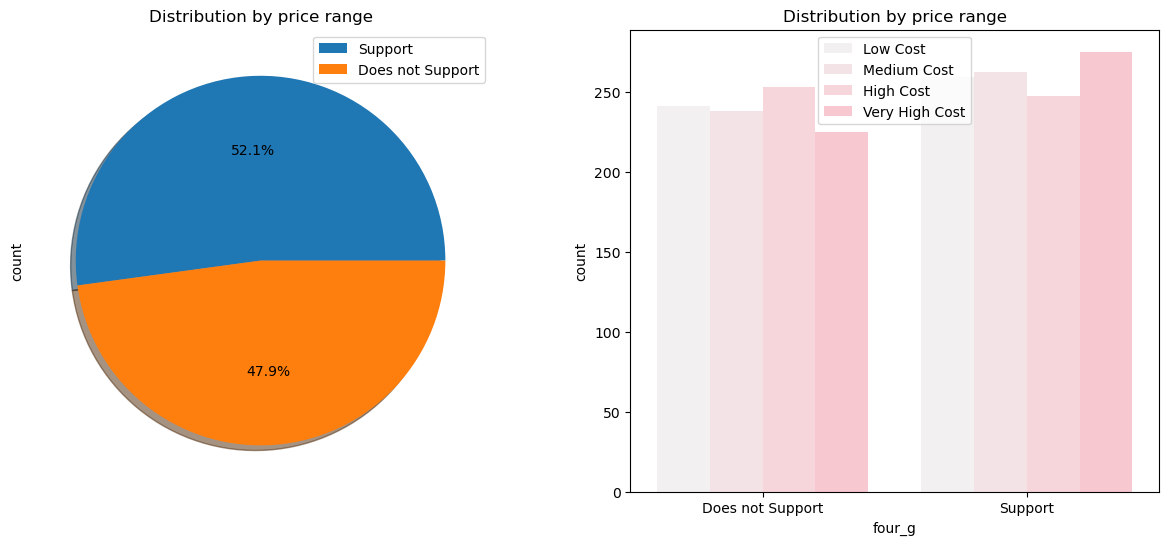

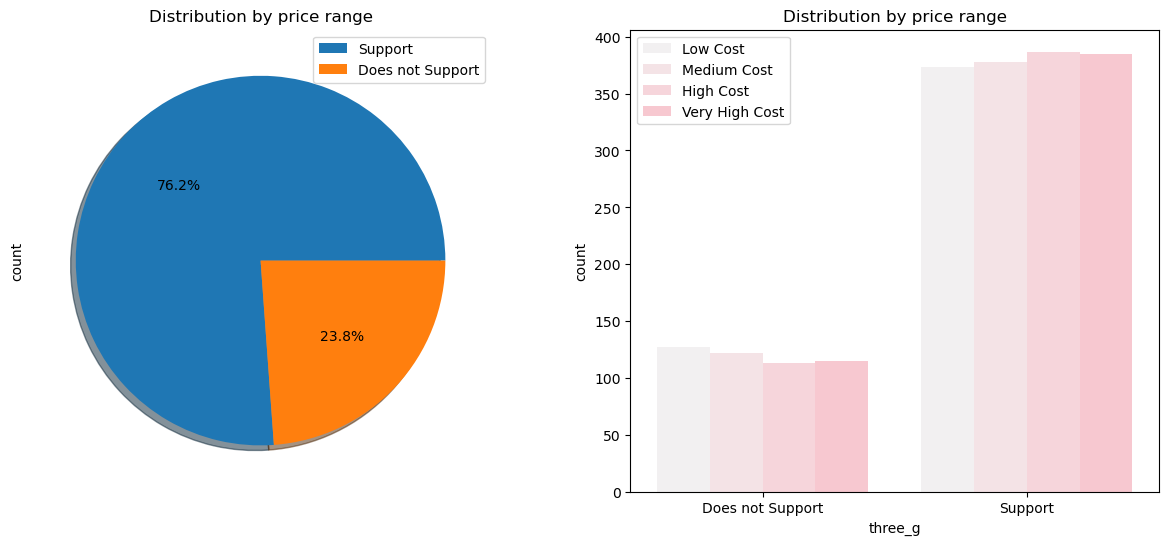

In [46]:

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

Almost 48% phones lack 4G connectivity and 23% phones lack 3G connectivity.<br>
Phones lacking 3G are not having 4G connectivity as well.

Seeing the technology growth having 4G connectivity is most important feature & should be available in all phones.

#### Chart - 5

In [47]:
wifi_counts = df['wifi'].value_counts()

labels = wifi_counts.index.map({1: 'Yes', 0: 'No'})
values = wifi_counts.values

fig = px.pie(
    names=labels,
    values=values,
    title="Wi-Fi Distribution",
    labels={'Yes': 'Wi-Fi Available', 'No': 'Wi-Fi Not Available'}
)

fig.show()

> Almost 50% phones lack wifi connectivity.<br>
> Wifi connectivity is a must have feature, should be present in all range of phones.
> There is good opportunity in for offering phones with wifi connectivity in higher price range.

#### Chart - 6

In [48]:
# Checking phones having touch screen feature
BarPlot('touch_screen',height=400,width=500)

> Almost 50% phones does not touch screen.<br>
> Almost 50% phones lack wifi connectivity.



#### Chart - 7

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.95it/s]


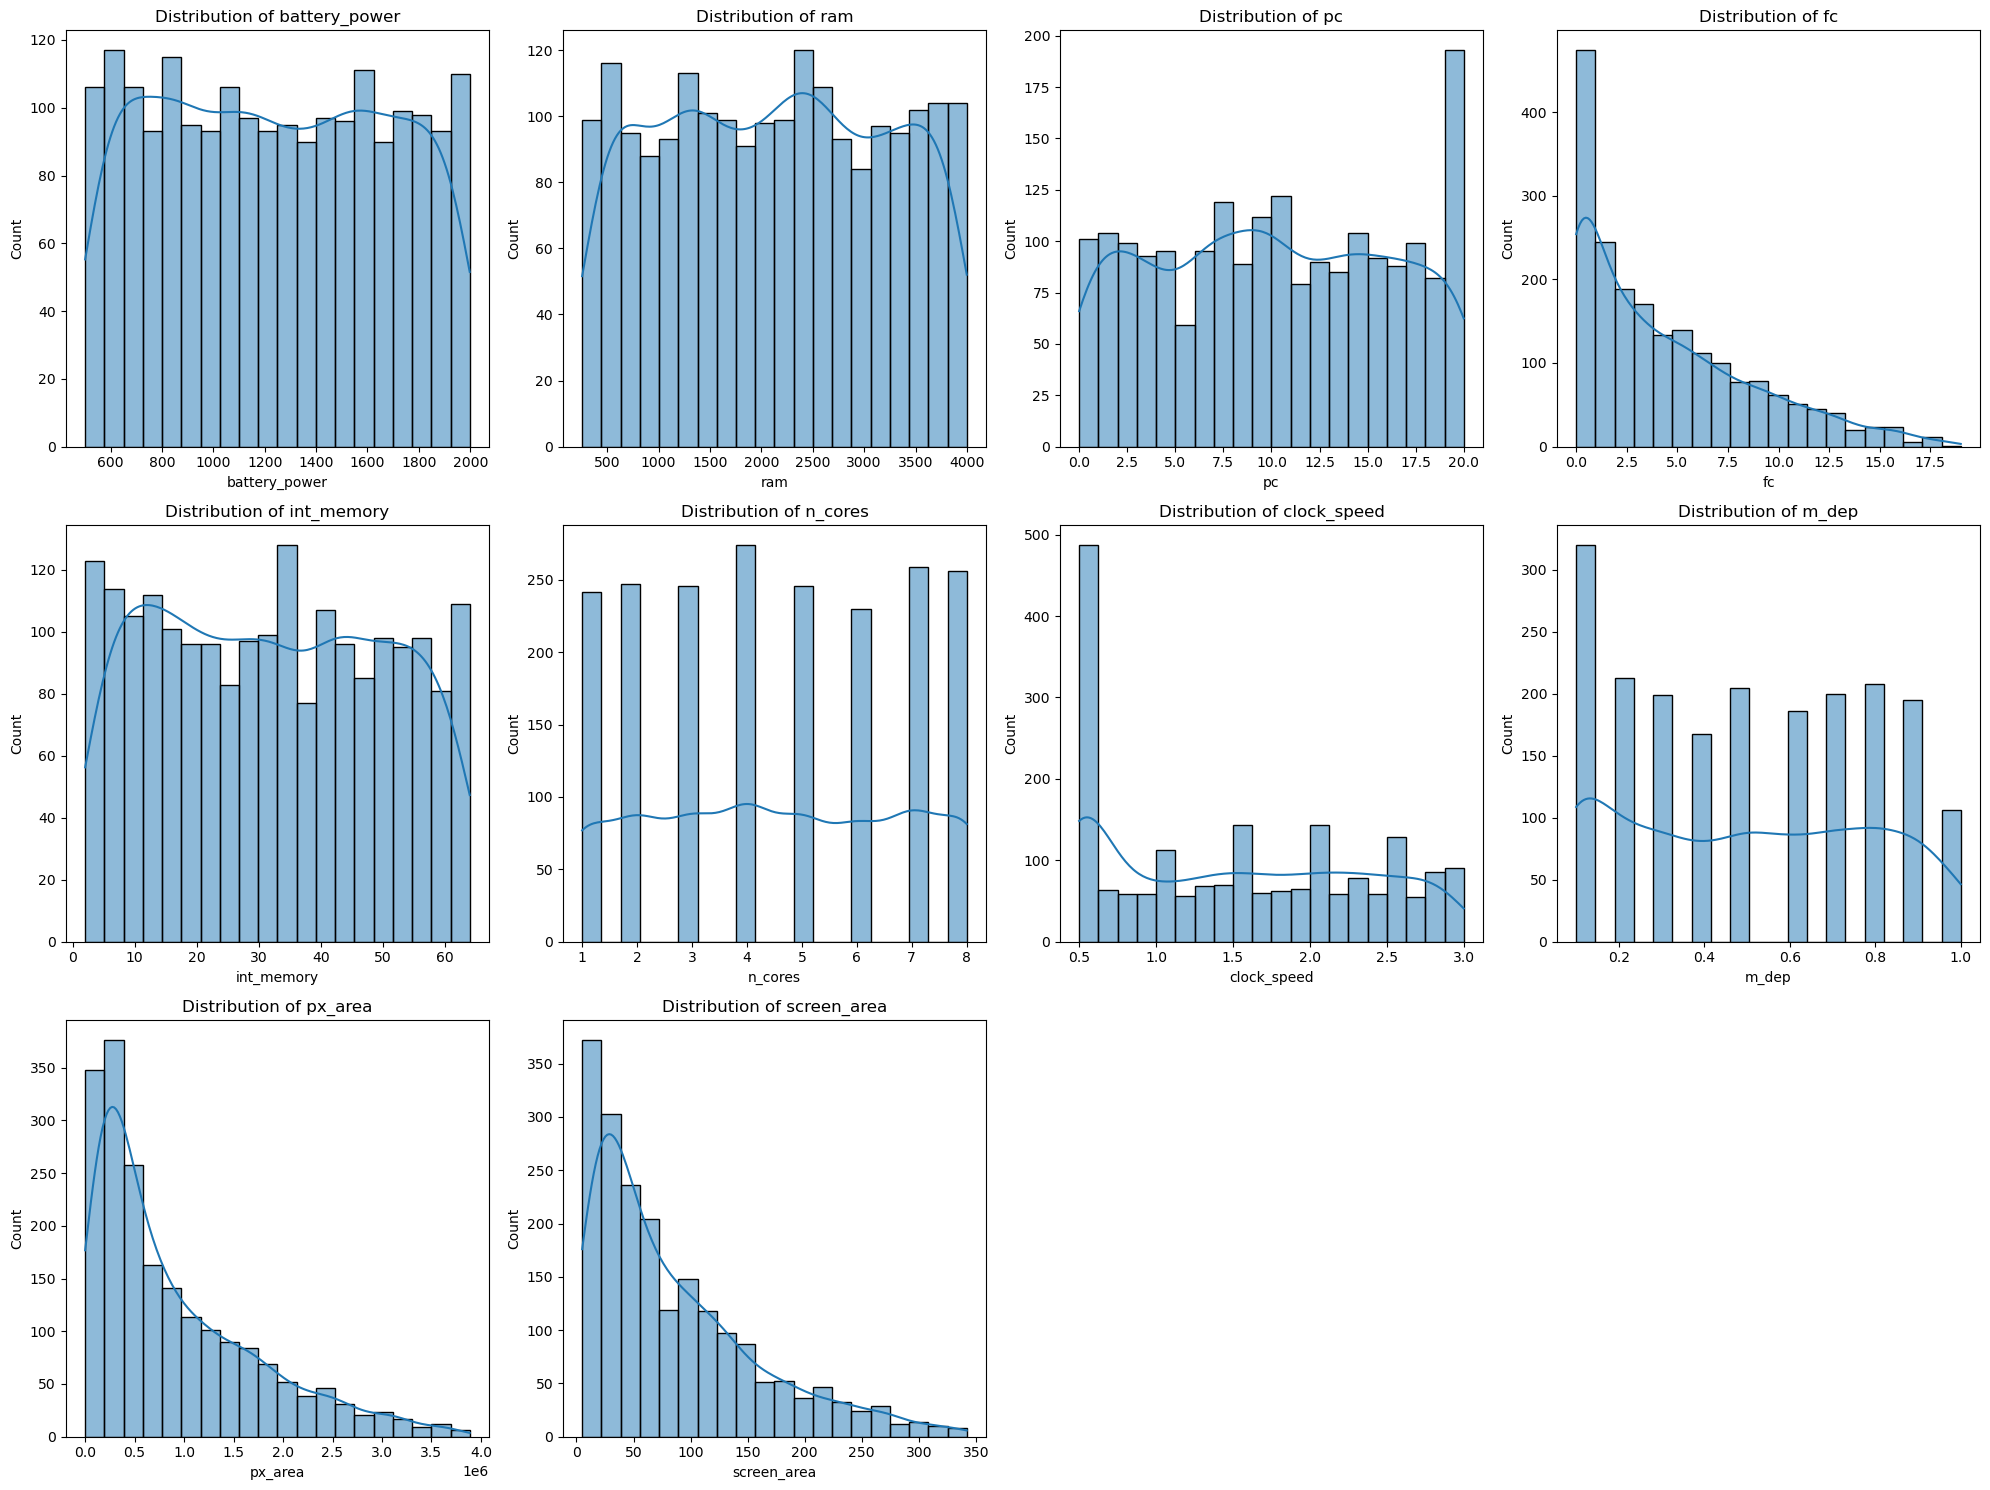

In [49]:
# Visualize the distribution of numerical features
numerical_cols = ['battery_power', 'ram','pc', 'fc', 'int_memory', 'n_cores', 'clock_speed', 'm_dep', 'px_area', 'screen_area']
rows=3 
cols=4
counter=1
fig = plt.figure(figsize=(20, 15))
for col in tqdm(numerical_cols):
    plt.subplot(rows,cols,counter)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    counter=counter+1
    plt.tight_layout()

> Distribution of data in 'Screen Area', 'Pixel Area' & 'Front cam' is positively skewed.

#### Chart - 8

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.33it/s]


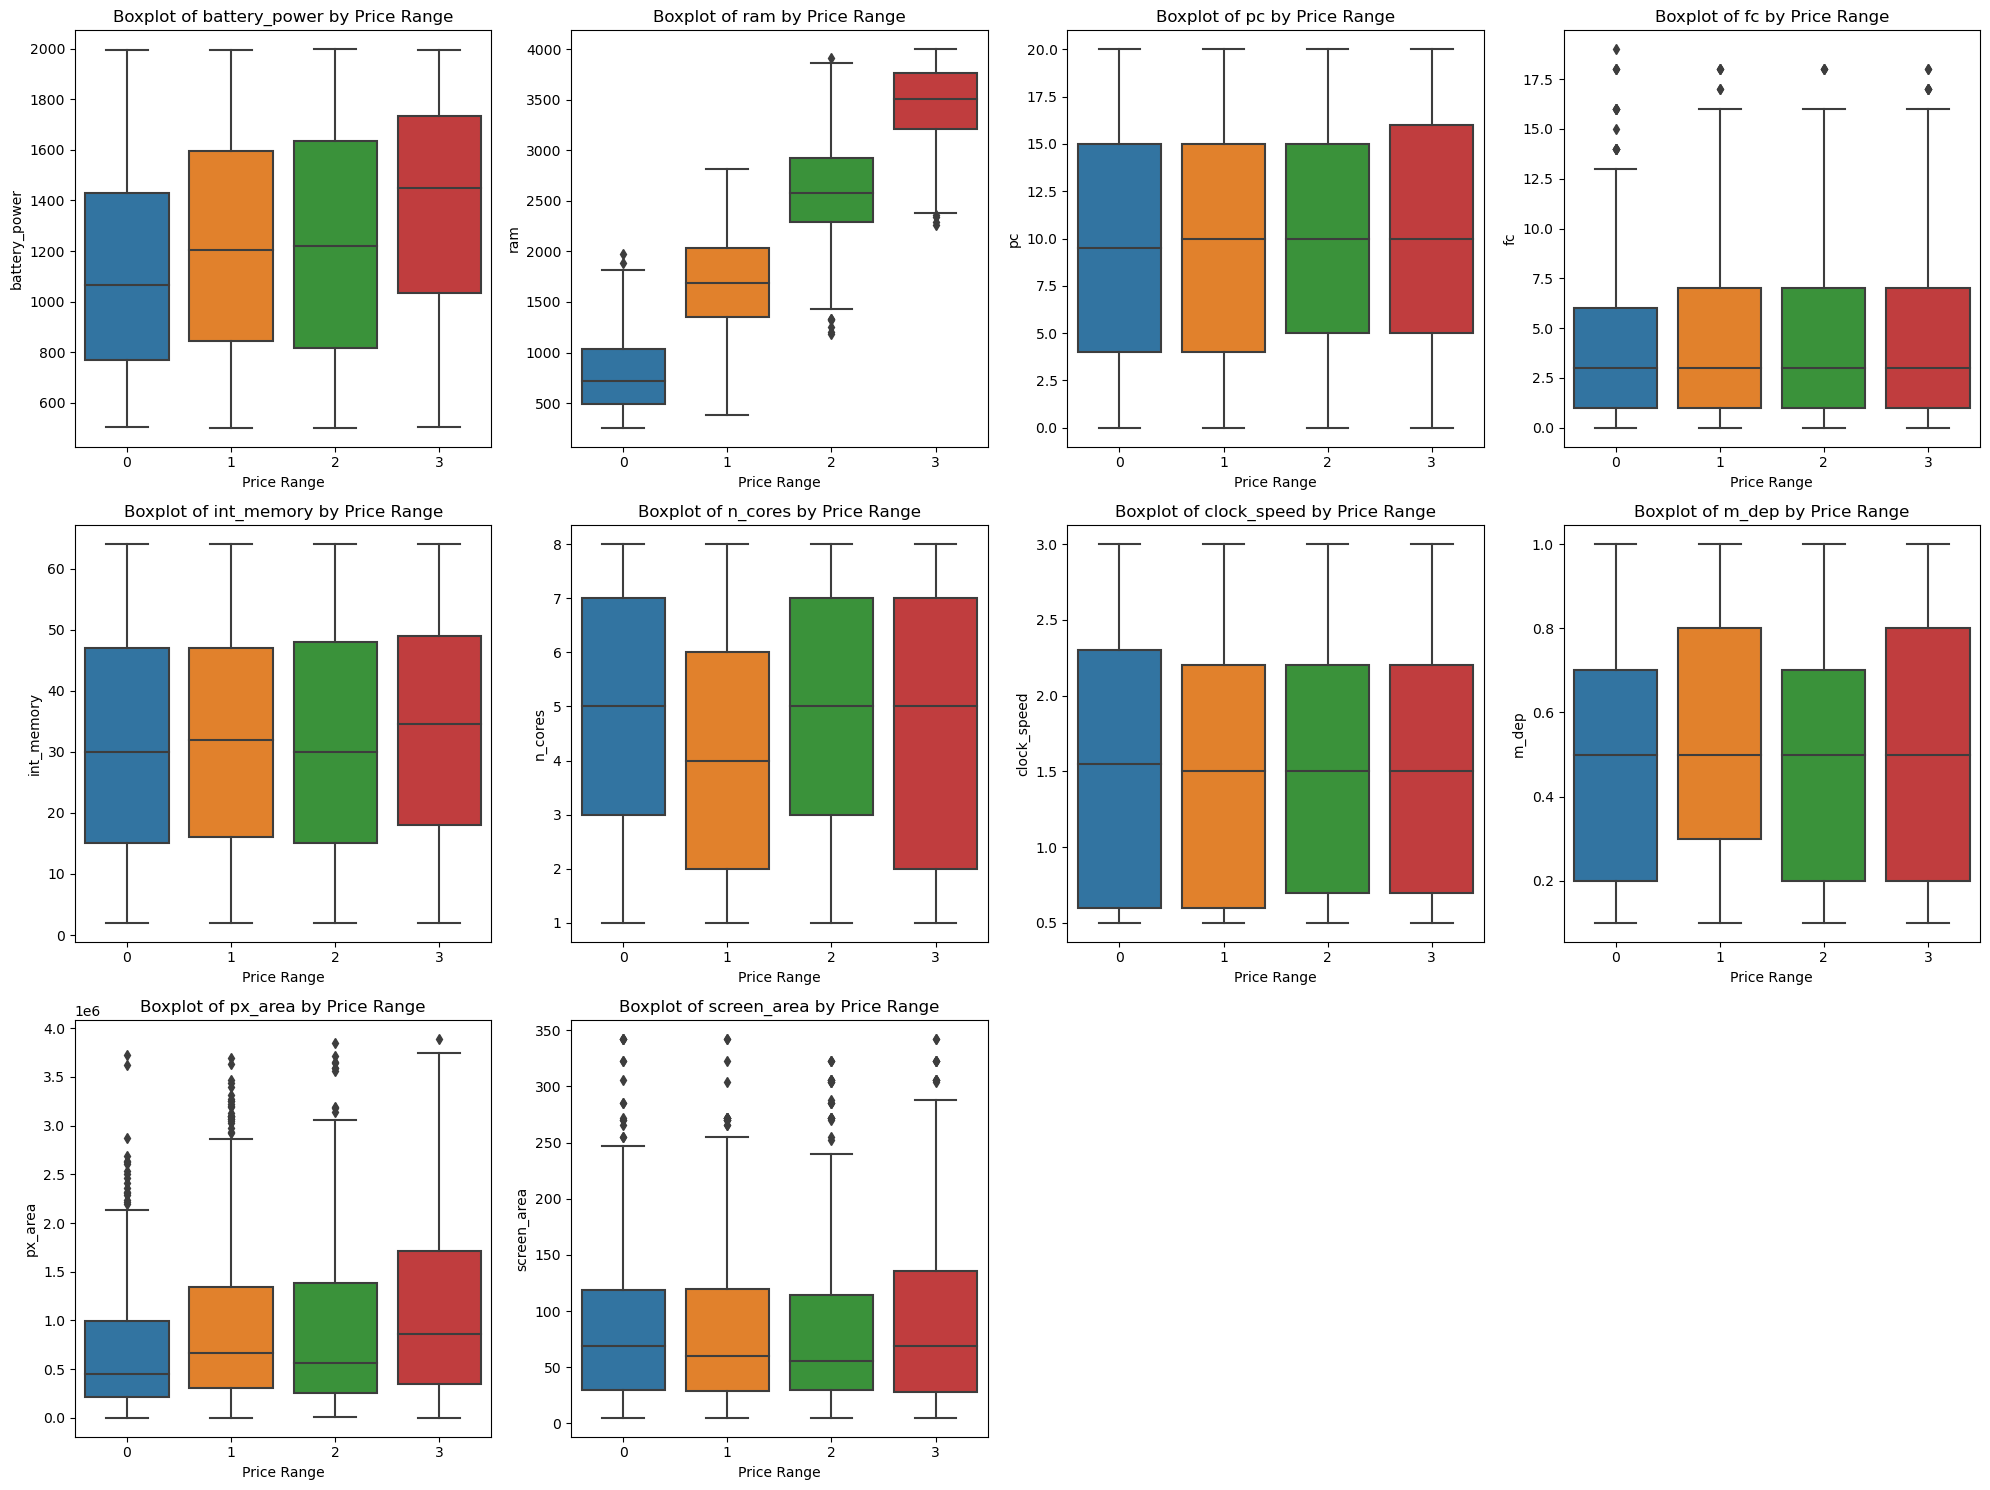

In [50]:
# Visualize the boxplots for numerical features by price range
rows=3 
cols=4
counter=1
fig = plt.figure(figsize=(20, 15))
for col in tqdm(numerical_cols):
    plt.subplot(rows,cols,counter)
    sns.boxplot(x='price_range', y=col, data=df)
    plt.title(f'Boxplot of {col} by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel(col)
    counter=counter+1
    plt.tight_layout()

There is presense of very few outliers in the numercal variables which can be ignored due to less observations in the dataset.

#### Chart - 9

In [51]:
# Checking relation between pixel area, screen area with price range.
Bivarite_barplot('px_area',height=500,width=600)
Bivarite_barplot('screen_area',height=500,width=600)

> Higher price phones have larger screen & larger pixels resulting in better screen quality.

#### Chart - 10

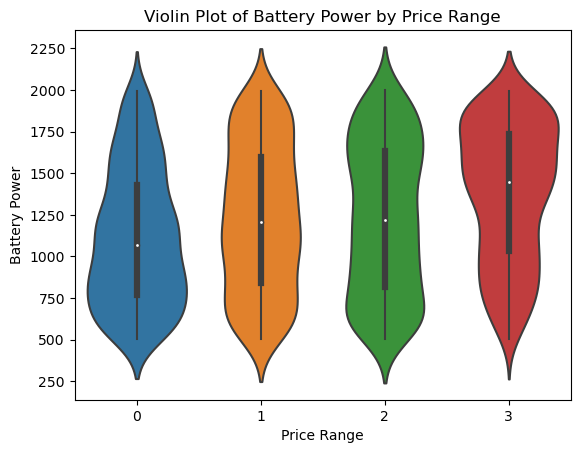

In [52]:
# Create Violin Plots of Battery Power by Price Range
sns.violinplot(x='price_range', y='battery_power', data=df)
plt.title('Violin Plot of Battery Power by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data.

Prices are directly proportional to the battery power provided in the phone.

Adequate amount of battery power should be in lower range phones too for longer performance of phone which can effect the brand image in a positive way.

#### Chart - 11

In [53]:
# Checking ram distribution on the basis of price range.
fig = go.Figure(data=[
    go.Bar(name = 'Price Range 0', x=['[0, 1024]', '[1024, 2048]', '[2048, 3072]', '[3072, 4096]'],y=ram_vs_pr.iloc[0]),
    go.Bar(name = 'Price Range 1', x=['[0, 1024]', '[1024, 2048]', '[2048, 3072]', '[3072, 4096]'],y=ram_vs_pr.iloc[1]),
    go.Bar(name = 'Price Range 2', x=['[0, 1024]', '[1024, 2048]', '[2048, 3072]', '[3072, 4096]'],y=ram_vs_pr.iloc[2]),
    go.Bar(name = 'Price Range 3', x=['[0, 1024]', '[1024, 2048]', '[2048, 3072]', '[3072, 4096]'],y=ram_vs_pr.iloc[3])])

fig.update_layout(width=900,height=500,barmode='group',title = 'Phones in Ram groups')
fig.show()

Lower price range phones mostly fall under 1GB RAM bin.

Higher price range phones mostly fall under 3GB to 4GB RAM bin.

#### Chart - 12

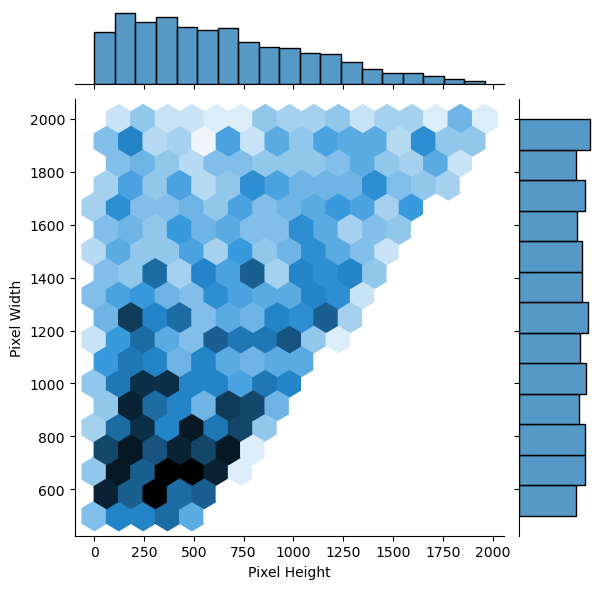

In [54]:
# Ploting Hexbin Plot of Pixel Height vs. Pixel Width.
sns.jointplot(x='px_height', y='px_width', data=df, kind='hex')
plt.xlabel('Pixel Height')
plt.ylabel('Pixel Width')
plt.show()

> Maximum phones have pixels in between(600×150- 1000×750) range.



#### Chart - 13

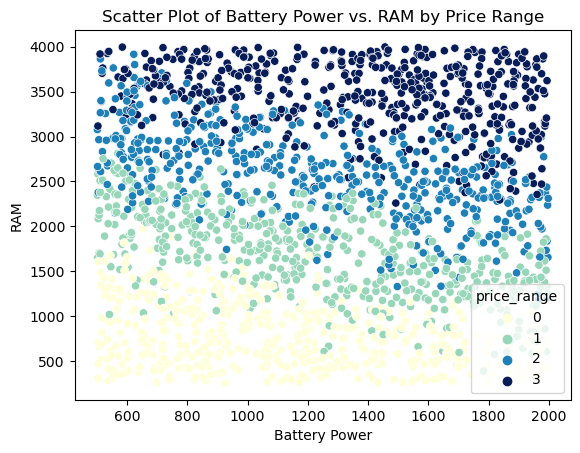

In [55]:
# checking relation between ram, battery power and price range.
sns.scatterplot(x='battery_power', y='ram', hue='price_range', data=df, palette='YlGnBu')
plt.title('Scatter Plot of Battery Power vs. RAM by Price Range')
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.show()

> Battery power & RAM is higher in case of expensive phones.

#### Chart - 14

In [56]:
# Showing the phones with no front and primary cam on the basis of price range.
fig = go.Figure(data=[
    go.Bar(name = 'No Frontcam', x=[0,1,2,3],y=no_fc['fc']),
    go.Bar(name = 'No Primarycam', x=[0,1,2,3],y=no_pc['pc'])])

fig.update_layout(width=900,height=500,barmode='group',title = 'Phones with no camera according to price range')
fig.show()

> There are more phones with no front cam than no primary cam throught all price ranges.

> Phones which are not having primary cam are also not having front cam.

> Manufacturers primary focus is on primary cam & ends up ditching front cam in many phones, it is a basic feature so front cam should be present in all higher price phones.

#### Chart - 15 - Correlation Heatmap

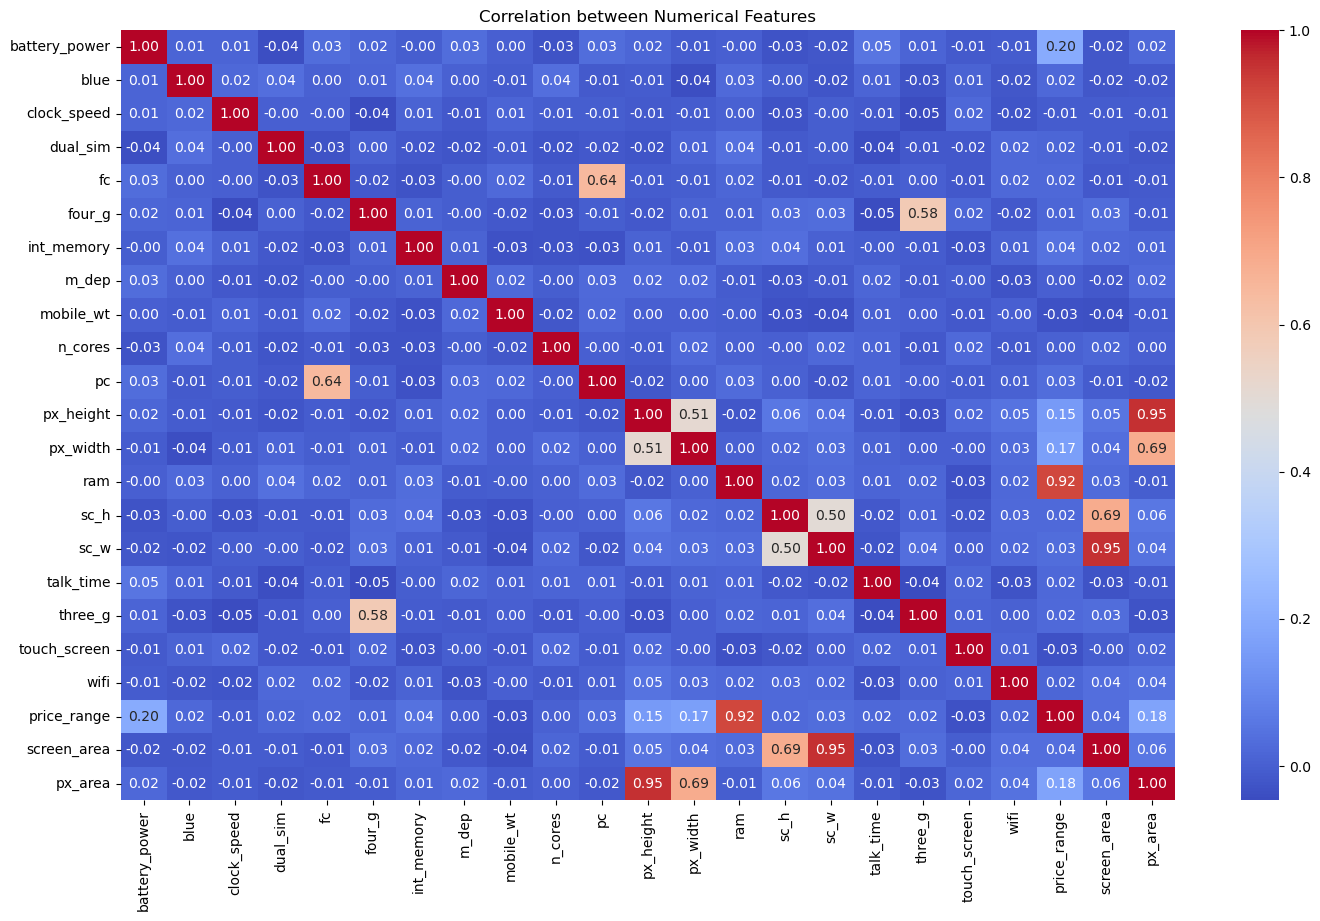

In [57]:
# Correlation Heatmap visualization code
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Numerical Features')
plt.show()

> Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.Since we want find relationship between diffrent variables in dataframe and heatmap can be one of the way to visualize it.

> RAM & Price range are highly correlated with each other.

> Primary cam & Front cam are highly correlated with each other.

> Pixel height & width are correlated with each other.

> Screen height & width are correlated with each other.

##  Hypothesis Testing

### Hypothetical Statement - 1

<b> H0(null hypothesis): There is no significant difference in the mobile price range with respect to average ram .

H1(alternate hypothesis): There is significant difference in the mobile price range with respect to average ram .

####  Performing an appropriate statistical test.

In [58]:
# Creating separate variable for ram based on lower & higher price range

low_range_phones_ram = df[df['price_range'] == 0]['ram']
high_range_phones_ram = df[df['price_range'] == 3]['ram']

# Two sample t-test
result,p_value = stats.ttest_ind(a=low_range_phones_ram, b=high_range_phones_ram,equal_var=True)

# #95% Confidence interval
if p_value < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 

We are rejecting null hypothesis


> Here I have done Two sample T-Test to obtain P-Value.A two-sample t-test is a statistical test used to compare the means of two different samples to determine if there is a significant difference between them. Since the p-value is less than 0.05, we can reject the null hypothesis.

### Hypothetical Statement - 2

<b> H0(null hypothesis): There is no significant difference in mobile price range with respect to average int_memory

H1(alternate hypothesis): There is significant difference in mobile price range with respect to average int_memory.

#### Performing an appropriate statistical test.

In [59]:
# Creating separate variable for internal memory based on lower & higher price range

low_range_phones_mem = df[df['price_range'] == 0]['int_memory']
high_range_phones_mem = df[df['price_range'] == 3]['int_memory']

# Perform the two sample t-test
result,p_value = stats.ttest_ind(a=low_range_phones_mem, b=high_range_phones_mem, equal_var=True)

#95% Confidence interval
if p_value < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 


We are rejecting null hypothesis


Here I have done Two sample T-Test to obtain P-Value. Since the p-value is less than 0.05, we can reject the null hypothesis.

### Hypothetical Statement - 3

<b> H0(null hypothesis): There is no significant dependency between the mobile price range and 4G connectivity.

H1(alternate hypothesis): There is significant dependency between the mobile price range and 4G connectivity.

#### Performing the appropriate statistical test.

In [60]:
# Create contingency table of price range and 4G connectivity
chi_table = pd.crosstab(df['price_range'], df['four_g'])

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)
print('p-value:',p_val)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 

p-value: 0.36471408196943356
We are accepting null hypothesis


A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying. Therefore, a chi-square test is an excellent choice to help us better understand and interpret the relationship between our two categorical variables.<br>
Pearson’s Chi-Square Test is used here.<br>
we can accept the null hypothesis as the p-value is greater than 0.05 which means there is significant dependency between the mobile price range and 4G connectivity.

### Hypothetical Statement - 4

<b> H0(null hypothesis): There is no significant difference in price range  with respect to screen area.

H1(alternate hypothesis): There is significant difference in price range with respect to screen area.

####  Perform an appropriate statistical test.

In [61]:
# Perform Statistical Test to obtain P-Value

low_range_phones = df[df['price_range'] == 0]
high_range_phones = df[df['price_range'] == 3]

# Performing non parametric mannwhitney test
stats, p_val=mannwhitneyu(low_range_phones.screen_area,high_range_phones.price_range)
print('p-value:',p_val)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis') 

p-value: 3.10631621305772e-188
We are rejecting null hypothesis


Mann-Whitney U test is used here. 

As the price range column is not normally distributed. So we cannot apply a parametric test that why we have applied a non-parametric Mann-Whitney U test to find the p-value.

##  Feature Engineering & Data Pre-processing

### 1. Handling Missing Values

There are no missing values present in the dataset.

### 2. Handling Outliers

There are very few outliers present in the dataset which can be ignored as dataset id very small.

### 3. Categorical Encoding

Categorical columns have already been encoded into binary format (0s and 1s), So, we do not need to perform furtherCategorical encoding.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [62]:
# Manipulate Features to minimize feature correlation and create new features
df.drop(['sc_h', 'sc_w','px_height','px_width'],axis=1,inplace = True)

> 'Screen_height' & 'Screen_width' are combined into 'Screen_area' and removed from the dataset.

> 'Pixel_height' & 'Pixel_width' are combined into 'Pixel_area' and removed from the dataset.

#### 2. Feature Selection

In [63]:
#Finding P and F-values of all the avaliable variables
from sklearn.feature_selection import SelectKBest,f_classif
df_copy = df.copy()
y=df_copy.pop('price_range')
X = df_copy
#for selecting 5 best features from dataset
feature_selector = SelectKBest(f_classif,k=10) 
fit=feature_selector.fit(X,y)

In [64]:

# Performing Statistical Test to obtain P-Value

#Storing results in dataframe 
p_values=pd.DataFrame(fit.pvalues_)
f_score=pd.DataFrame(fit.scores_)
input_variable_names=pd.DataFrame(X.columns)

#Concating two dataframe
summary_stats=pd.concat([input_variable_names,p_values,f_score],axis=1)
summary_stats.columns=['input_variable','p_value','f_score']

#Selecting values based on 90% confidence interval.
selected_variable=summary_stats.loc[(summary_stats['p_value']<=0.1)]
selected_variable.sort_values(by='f_score',ascending = True,inplace=True)
selected_variable

input_variable  p_value  f_score
16    screen_area     0.10     2.12
9         n_cores     0.05     2.63
6      int_memory     0.03     2.92
8       mobile_wt     0.01     3.59
17        px_area     0.00    26.36
0   battery_power     0.00    31.60
11            ram     0.00  3520.11

In [65]:
# summary_stats.sort_values(by='p_value',ascending = False)

In [66]:
# Selecting independent variables based on p-value
X = df[selected_variable.input_variable]
y = df['price_range']

In [67]:
X.head()

screen_area  n_cores  int_memory  mobile_wt    px_area  battery_power   ram
0        63.00        2           7        188   15120.00            842  2549
1        51.00        3          53        136 1799140.00           1021  2631
2        22.00        5          41        145 2167308.00            563  2603
3       128.00        6          10        131 2171776.00            615  2769
4        16.00        2          44        141 1464096.00           1821  1411

> Here I used sklearn.feature_selection module for feature selection/dimensionality reduction on dataset, to improve estimators accuracy scores and to boost their performance on very high-dimensional datasets.

> checked p-value for all independent variables and removed features which are having confidence interval below 90%.

### 5. Data Transformation

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  3.03it/s]


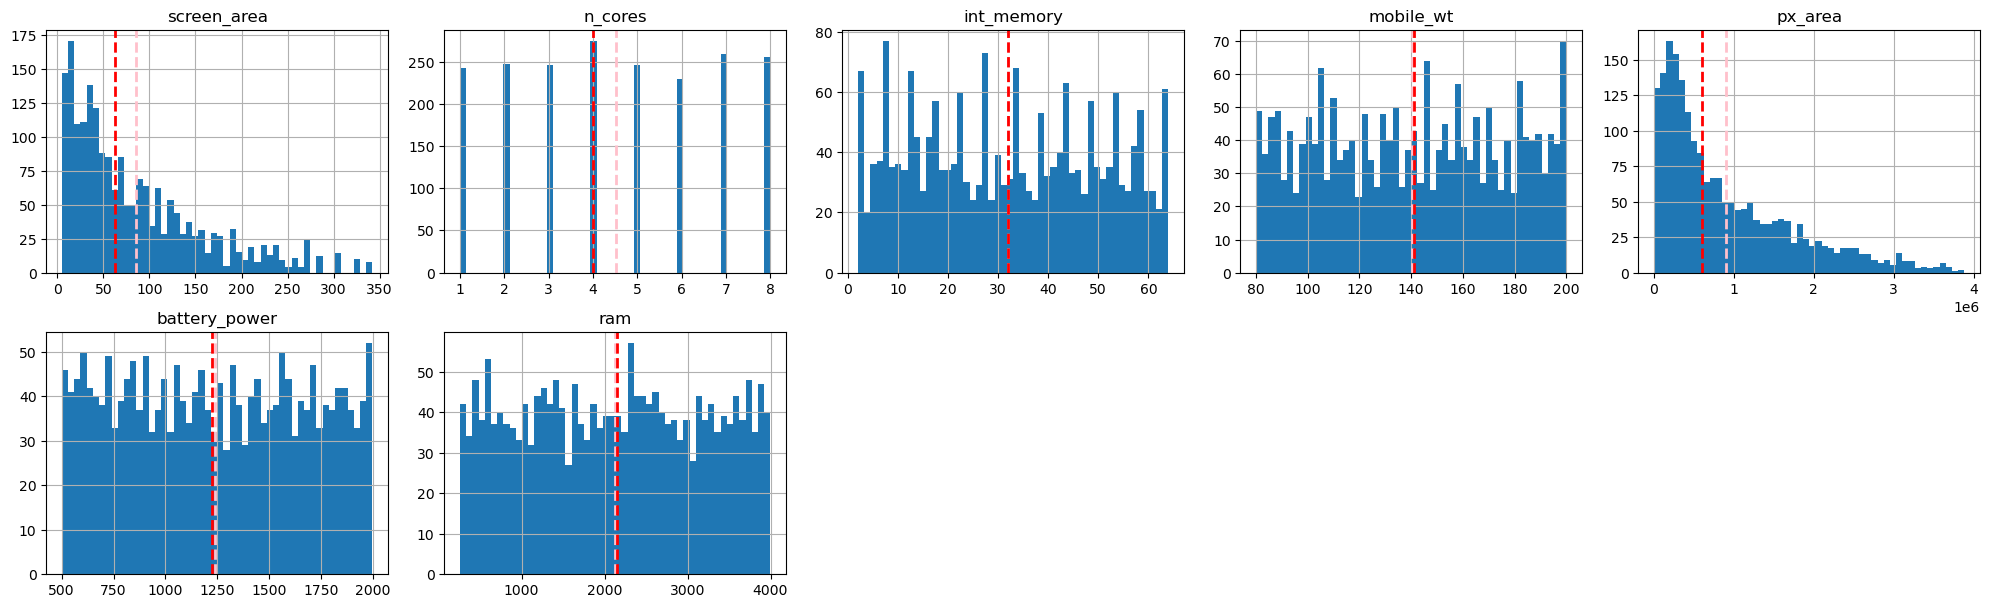

In [68]:
# Transform Your data

rows=5
cols=5
counter=1
fig = plt.figure(figsize=(20,15))
for col in tqdm(X.columns): 
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  X[col].hist(bins=50, ax = ax) 
  ax.axvline(X[col].mean(), color = 'pink',linestyle='dashed', linewidth=2) 
  ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

In [69]:
# Transform Your data
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(copy=False)
# X[['fc','screen_area','px_area']]=pt.fit_transform(X[['fc','screen_area','px_area']])
X[['screen_area','px_area']]=pt.fit_transform(X[['screen_area','px_area']])

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.88it/s]


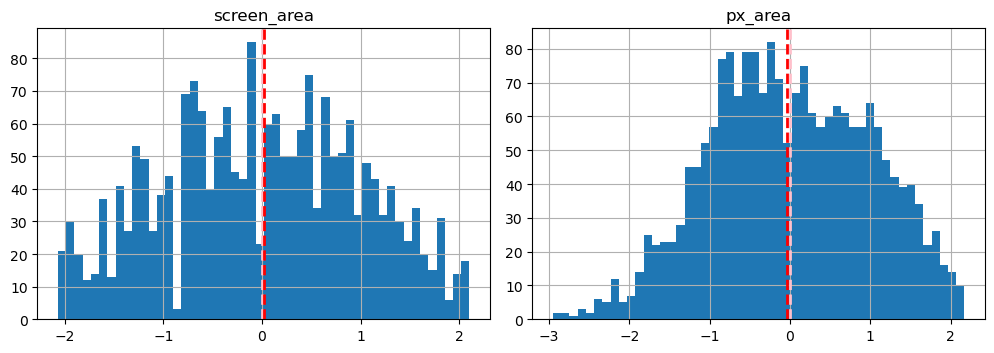

In [70]:
# Transform Your data
rows=3
cols=3
counter=1
fig = plt.figure(figsize=(15,10))
# for col in ['fc','screen_area','px_area']: 
for col in tqdm(['screen_area','px_area']):
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  X[col].hist(bins=50, ax = ax) 
  ax.axvline(X[col].mean(), color = 'pink',linestyle='dashed', linewidth=2) 
  ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

> Here used power transformation on variables 'fc', 'screen_area', 'px_area' to transform it into normal distribution.

> There is not much effect on variable 'fc' but the other two variables have transfromed upto some extent.

> Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

### 6. Data Scaling

In [71]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

#Creating object 
scaler = StandardScaler()

#Fit on data
X_scaled=scaler.fit_transform(X)

In [72]:
#converting to dataframe
X_scaled_df=pd.DataFrame(data=X_scaled,columns=X.columns,index=X.index)

> StandardScaler is used to resize the distribution of values ​​so that the mean of the observed values ​​is 0 and the standard deviation is 1

### 7. Dimesionality Reduction

> Dimensionality reduction is the process of reducing the number of features (or dimensions) in a dataset while retaining as much information as possible, it is done to reduce the complexity of a model, to improve the performance of a learning algorithm and it makes easier to visualize the data.

> Already done in feature selection part

>  Here sklearn.feature_selection module is used for feature selection/dimensionality reduction.

### 8. Data Splitting

In [73]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X_scaled_df,y , test_size = 0.25, random_state = 123) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 7)
(500, 7)
(1500,)
(500,)


> I have splitted 75% of dataset into training data and 25% into testing data.

### 9. Handling Imbalanced Dataset

Dataset is balanced.

##  ML Model Implementation

### 1. Logistic Regression

In [74]:
# Importing required libraries
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [75]:
# ML Model Implementation
lr = LogisticRegression()

# Fit the Algorithm
lr.fit(X_train, y_train)

# Predict on the model
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [76]:
# let's generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix :\n', cf_matrix)

Confusion matrix :
 [[113   6   0   0]
 [  3 118   7   0]
 [  0   6 125   6]
 [  0   0   7 109]]


Here,

Class(0): suggests model correctly predicted class 0 for 113 instances and incorrectly predicted class 1 for 6 instances.

Class(1): indicates that the model correctly predicted class 1 for 118 instances but incorrectly predicted class 0 for 3 instances and class 7 for 14 instances.

Class(2): model correctly predicted class 2 for 125 instances but incorrectly predicted class 1 for 6 instances and class 3 for 6 instances.

Class(3): model correctly predicted class 3 for 109 instances but incorrectly predicted class 2 for 7 instances.

In [77]:
# let's generate a classification report for test set
print('Classification report for Logistic Regression (For Train set) :\n')
print(classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (For Train set) :

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       387
           1       0.93      0.94      0.94       370
           2       0.91      0.94      0.93       352
           3       0.98      0.96      0.97       391

    accuracy                           0.95      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.95      0.95      0.95      1500



In a Classification report :
1. Precision measures the accuracy of positive predictions made by the model.
2. Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify positive instances from all actual positive instances.
3. The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance.
4. Support represents the number of instances in each class in the testing dataset.
5. Accuracy measures the overall correctness of the model's predictions across all classes.
6. Macro Average calculates the unweighted average of precision, recall, and F1-score across all classes. It gives equal importance to each class. While, Weighted Average calculates the average while taking into account the number of instances in each class. It gives more weight to classes with more instances.

In [78]:
# now generating a classification report for train set
print('Classification report for Logistic Regression (For Test set) :\n')
print(classification_report(y_pred_test, y_test))

Classification report for Logistic Regression (For Test set) :

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       116
           1       0.92      0.91      0.91       130
           2       0.91      0.90      0.91       139
           3       0.94      0.95      0.94       115

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



From this we can infer:
1. Precision: Class 0 has the highest precision (0.95), indicating that 95% of instances predicted as class 0 were correct.
2. Recall: Class 0 also has the highest recall (0.97), indicating that 97% of actual class 0 instances were correctly identified.
3. F1-Score: Class 0 has a high F1-score (0.96), indicating a balance between precision and recall.
4. Support: Highest are 116 instances for class 0.
5. The macro average values (0.93) suggest a balanced performance across all classes. The weighted average values (0.93) indicate a similar balanced performance, taking class frequencies into account.
6. Accuracy: Overall model accuracy is 0.93, which means the model correctly predicts the class label for 93% of the instances in the test set.

#### Cross- Validation & Hyperparameter Tuning

In [79]:
# Hyperparameter optimization with GridSearchCV implementation
param = {'C':[0.01,0.1,1,10,100,110,120,130]}   # setting parameters
grid = GridSearchCV(LogisticRegression(max_iter=500), param, n_jobs=-1)

# fit algorithm
grid.fit(X_train, y_train)

# predict on the model
y_pred_lr = grid.predict(X_test)

I used GridSearchCV, as it automates the search for optimal hyperparameters in machine learning models, ensuring improved model performance and reduced overfitting. It efficiently explores predefined hyperparameter combinations, making it a valuable tool for model tuning and selection. Additionally, GridSearchCV seamlessly integrates cross-validation to assess model generalization across different data subsets.

In [80]:
# getting train and test scores
trainscore = grid.score(X_train, y_train)
testscore = grid.score(X_test, y_test)

print("Train score : {}".format(trainscore),'\n')
print("Test score : {}".format(testscore),'\n')

# getting confusion matrix
print('Confusion Matrix after tuning :\n')
print(confusion_matrix(y_test, y_pred_lr))

Train score : 0.9513333333333334 

Test score : 0.926 

Confusion Matrix after tuning :

[[113   6   0   0]
 [  3 118   7   0]
 [  0   6 123   8]
 [  0   0   7 109]]


In [81]:
Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

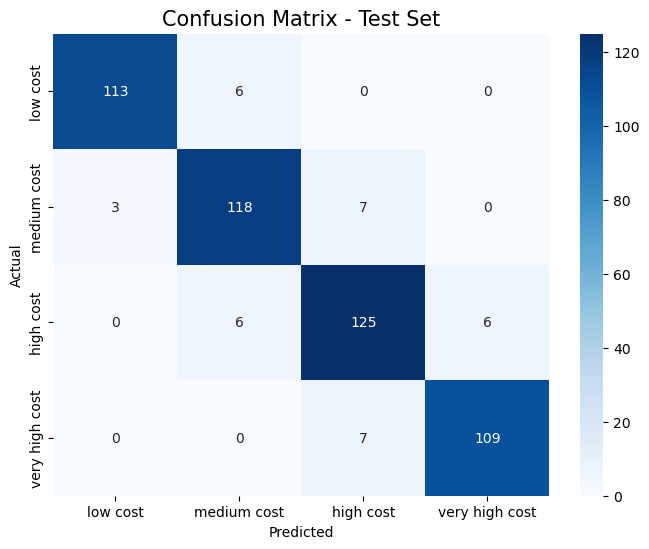

In [82]:
y_pred = lr.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=Class_cat, yticklabels=Class_cat)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set', fontsize=15)
plt.show()

Firstly,
1. Training score of 0.95 (or 95%) indicates that the model correctly predicted the class labels for approximately 95% of the instances in the training dataset.
2. Test score of 0.926 (or 92.6%) indicates that the model correctly predicted the class labels for approximately 92.6% of the instances in the test dataset.

This indicates a good model performance.

Secondly, In confusion matrix:
1.  Class 0: Out of 119 instances of class 0, 113 were correctly classified as class 0. There were 6 instances of class 0 that were incorrectly classified as class 1.
2. Class 1: Out of 128 instances of class 1, 118 were correctly classified as class 1. However, 3 instances of class 1 were incorrectly classified as class 0, and 7 instances were incorrectly classified as class 2.
3. Class 2: Out of 137 instances of class 2, 123 were correctly classified as class 2. However, 6 instances of class 2 were incorrectly classified as class 1, and 8 instances were incorrectly classified as class 3.
4. Class 3: Out of 116 instances of class 3, all 109 were correctly classified as class 3. There were no instances of class 3 that were incorrectly classified as other classes.

In [83]:
# get classification report after model tuning
print('Classification report after tuning (for Test set) :\n', classification_report(y_test, y_pred_lr))

Classification report after tuning (for Test set) :
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       119
           1       0.91      0.92      0.91       128
           2       0.90      0.90      0.90       137
           3       0.93      0.94      0.94       116

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



In the above classification report after cross validation and hyperparameter tuning:

The overall accuracy of the model on the test set is 0.93 (or 93%). This indicates that the model correctly predicts the class labels for 93% of the instances in the test dataset.

We can say,

classification report shows improved model performance after tuning. The model exhibits high precision, recall, and F1-scores for most classes, with good overall accuracy. The class-specific metrics provide a detailed view of the model's performance for each class, which can be valuable for understanding how well the model handles different categories

# 2. Random Forest Classifier

In [84]:
# ML model implememtation
RFmodel = RandomForestClassifier(criterion = 'entropy', max_depth=9)

# model fit
RFmodel.fit(X_train, y_train)

# predict on the model
y_pred_rf = RFmodel.predict(X_test)

In [85]:
# getting train and test scores
trainscore = RFmodel.score(X_train, y_train)
testscore = RFmodel.score(X_test, y_test)
print('Train score :', format(trainscore),'\n')
print('Test score :', format(testscore),'\n')

# getting confusion matrix
print('Confusion matrix for Random Forest Classifier :\n')
print(confusion_matrix(y_test, y_pred_rf))

Train score : 0.9966666666666667 

Test score : 0.882 

Confusion matrix for Random Forest Classifier :

[[116   3   0   0]
 [ 12 109   7   0]
 [  0  13 112  12]
 [  0   0  12 104]]


Firstly,
1. The training score of approximately 0.998 (or 99.8%) indicates that the model achieved an extremely high accuracy on the training dataset.
2. The test score of 0.88 (or 88%) indicates the model's accuracy on the test dataset. While the test score is not as high as training score still, it is relatively good.

Secondly, for the confusion  matrix:
1. Class 0: Out of 119 instances of class 0, 115 were correctly classified,
while 4 instances of class 0 were incorrectly classified as class 1.
2. Class 1: Out of 128 instances of class 1, 108 were correctly classified,
however 10 instances of class 1 were incorrectly classified as class 0 and 10 instances were incorrectly classified as class 2.
3. Class 2: Out of 137 instances of class 2, 115 were correctly classified, however 10 instances of class 2 were incorrectly classified as class 1 and 12 instances were incorrectly classified as class 3.
4. Class 3: Out of 116 instances of class 3, 106 were correctly classified, while there were 10 instances of class 3 that were incorrectly classified as class 2.

In [86]:
# getting the classification report
print('Classification report for Random Forest Classifier (for Test set) :\n')
print(classification_report(y_test, y_pred_rf))

Classification report for Random Forest Classifier (for Test set) :

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       119
           1       0.87      0.85      0.86       128
           2       0.85      0.82      0.84       137
           3       0.90      0.90      0.90       116

    accuracy                           0.88       500
   macro avg       0.88      0.89      0.88       500
weighted avg       0.88      0.88      0.88       500



From this we can infer that,
1. mcro avg : The average precision, recall, and F1-score calculated across all classes equally. The macro average values suggest an almost balanced performance across classes.
2. weighted avg : The average precision, recall, and F1-score weighted by the number of instances in each class. The weighted average values (0.89) indicate a similar balanced performance, taking class frequencies into account.
3. Accuracy : The model's overall accuracy on the test set is 0.89 (or 89%), indicating that it correctly predicts the class labels for 89% of the instances in the test dataset.

In [87]:
# cross validation implementation
# setting parameters
params = {'n_estimators':[50,100], 'max_depth':[20,30,40], 'min_samples_split':[2,4],
          'max_features':['sqrt','log2','auto'], 'max_leaf_nodes':[20,40]}

rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, params, scoring='accuracy', cv=3, n_jobs=-1)

# model fit
grid_rf.fit(X_train, y_train)

# predict on the model
y_pred_rfg = grid_rf.predict(X_test)

In [88]:
# getting best parameter values
print('Best parameters :\n', grid_rf.best_params_)
# getting best estimator
print('Best Estimator :\n', grid_rf.best_estimator_)
# getting best score
print('Best score :\n', grid_rf.best_score_)

Best parameters :
 {'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': 40, 'min_samples_split': 2, 'n_estimators': 100}
Best Estimator :
 RandomForestClassifier(max_depth=20, max_features='log2', max_leaf_nodes=40)
Best score :
 0.8706666666666667


In [89]:
# getting classification report
print('Classificaton report for GridSearchCV Classifier after tuning (for Test set) :\n')
print(classification_report(y_test, y_pred_rfg))

Classificaton report for GridSearchCV Classifier after tuning (for Test set) :

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       119
           1       0.83      0.83      0.83       128
           2       0.85      0.77      0.81       137
           3       0.89      0.95      0.92       116

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.87      0.88      0.87       500



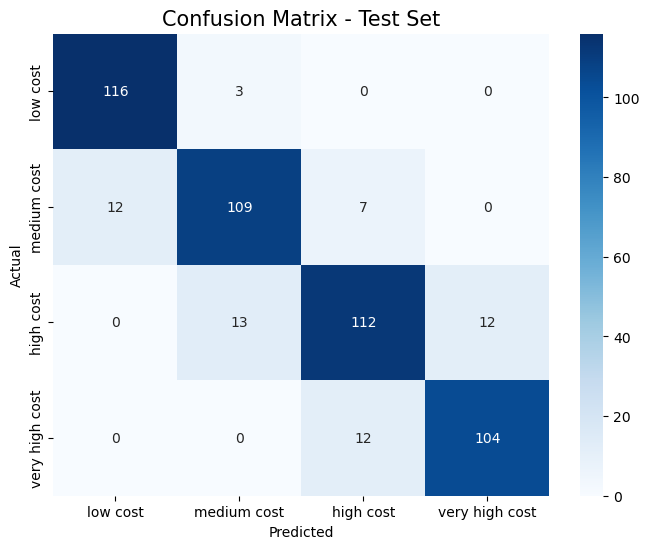

In [90]:
y_pred = RFmodel.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=Class_cat, yticklabels=Class_cat)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set', fontsize=15)
plt.show()

# 3. Decision Tree

In [91]:
# Model Implimentation
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier(max_depth=6)

# model fitting
DTmodel.fit(X_train, y_train)

# predict on the model
y_pred_DT = DTmodel.predict(X_test)

In [92]:
# evaluation metrics
trainscore = DTmodel.score(X_train, y_train)
testscore = DTmodel.score(X_test, y_test)
# getting trainscore and testscore
print('Trainscore :\n', format(trainscore))
print('Testscore :\n', format(testscore),'\n')

# getting confusion matrix
print('Confusion matrix for Decision Tree :\n', confusion_matrix(y_test, y_pred_DT))

Trainscore :
 0.9286666666666666
Testscore :
 0.856 

Confusion matrix for Decision Tree :
 [[108  11   0   0]
 [ 10 105  13   0]
 [  0  13 115   9]
 [  0   0  16 100]]


Firstly,
1. For Training: A score of 0.9286 suggests that our model was able to correctly predict the target variable for approximately 92.86% of the examples in our training dataset which is good.
2. For Testing : A score of 0.85 means that our model was able to correctly predict the target variable for approximately 85% of the examples in the test dataset, which is not bad but lower than training score.

Secondly, for confusion matrix:
1. Class 0: Out of 119 instances of class 0, 108 were correctly classified, while 11 instances of class 0 were incorrectly classified as class 1.
2. Class 1: Out of 128 instances of class 1, 104 were correctly classified, however 11 instances of class 1 were incorrectly classified as class 0 and 13 instances were incorrectly classified as class 2.
3. Class 2: Out of 137 instances of class 2, 115 were correctly classified, however 13 instances of class 2 were incorrectly classified as class 1 and 9 instances were incorrectly classified as class 3.
4. Class 3: Out of 116 instances of class 3, 100 were correctly classified, while there were 16 instances of class 3 that were incorrectly classified as class 2.

In [93]:
# getting classification report
print('Classification Report for Decision Tree (for Test set) :\n',classification_report(y_test, y_pred_DT))

Classification Report for Decision Tree (for Test set) :
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       119
           1       0.81      0.82      0.82       128
           2       0.80      0.84      0.82       137
           3       0.92      0.86      0.89       116

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



With an accuracy of 86% and weighted average F1-score of 0.86 indicates that the model's performance is balanced across the classes. Also our model seems to perform reasonably well on the test set, with good precision, recall, and F1-scores for each class achieving a good overall accuracy.

#####  Cross- Validation & Hyperparameter Tuning

In [94]:
# GridSearchCV implementation
DTgrid = GridSearchCV(DTmodel, param_grid={'max_depth': (5,30), 'max_leaf_nodes': (10,100)}, scoring='accuracy', cv=5, verbose=24)
# fitting the Algorithm
DTgrid.fit(X_train, y_train)
# predict on the model
y_pred_DTG = DTgrid.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.800 total time=   0.0s
[CV 2/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.763 total time=   0.0s
[CV 3/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.803 total time=   0.0s
[CV 4/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 4/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.777 total time=   0.0s
[CV 5/5; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 5/5; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.723 total time=   0.0s
[CV 1/5; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/5; 2/4] END max_depth=5, max_leaf_node

In [95]:
# getting best parameters
print('Best Parameters :\n', DTgrid.best_params_)
# getting best estimator
print('Best Estimator :\n', DTgrid.best_estimator_)

Best Parameters :
 {'max_depth': 30, 'max_leaf_nodes': 100}
Best Estimator :
 DecisionTreeClassifier(max_depth=30, max_leaf_nodes=100)


In [96]:
# getting classification report
print('Classification report after cross validation (for Test set) :\n', classification_report(y_test, y_pred_DTG))

Classification report after cross validation (for Test set) :
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       119
           1       0.85      0.81      0.83       128
           2       0.83      0.81      0.82       137
           3       0.88      0.90      0.89       116

    accuracy                           0.86       500
   macro avg       0.86      0.87      0.86       500
weighted avg       0.86      0.86      0.86       500



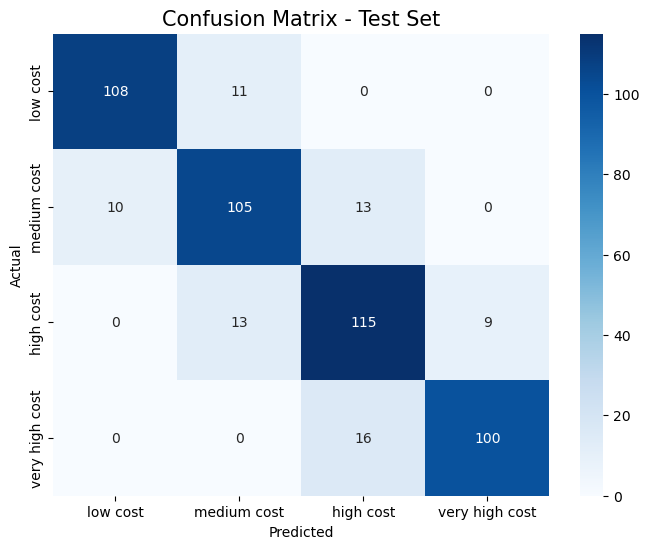

In [97]:
y_pred = DTmodel.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=Class_cat, yticklabels=Class_cat)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set', fontsize=15)
plt.show()

# 4.K-Nearest Neighbour (K-NN) Classifier

In [98]:
# model implimentation
knn = KNeighborsClassifier(n_neighbors=90)
# model fit
knn.fit(X_train, y_train)
# predict on the model
y_pred_knn = knn.predict(X_test)

In [99]:
# getting train and test scores
trainscore = knn.score(X_train, y_train)
print('Train score :\n', format(trainscore))

testscore = knn.score(X_test, y_test)
print('Test score :\n', format(testscore),'\n')

# getting confusion matrix
print('Confusion matrix for k-NN : \n', confusion_matrix(y_test, y_pred_knn))

Train score :
 0.7853333333333333
Test score :
 0.786 

Confusion matrix for k-NN : 
 [[107  12   0   0]
 [ 18  97  13   0]
 [  0  26  95  16]
 [  0   1  21  94]]


From the low scores it is evident that the k-NN model struggled to correctly classify some instances, especially in classes 1 and 2. Moreover, model's score of 78.6% suggests that it's performance on the test data is relatively moderate.

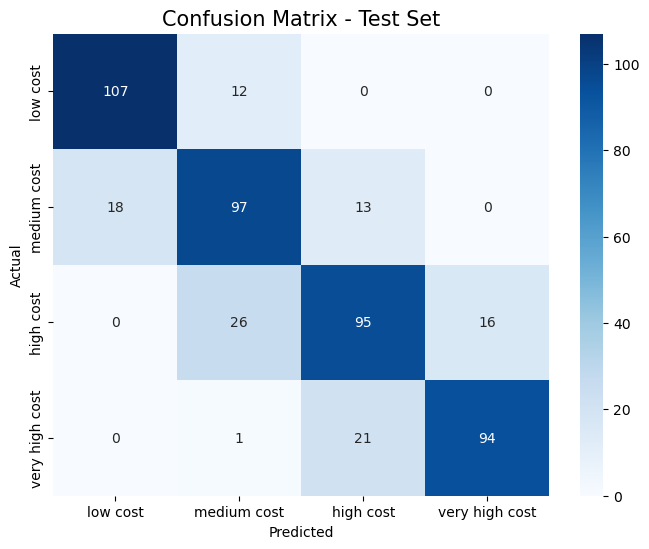

In [100]:
y_pred = knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=Class_cat, yticklabels=Class_cat)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set', fontsize=15)
plt.show()

In [101]:
# getting classification report
print('Classification report for k-NN (for Test set) :\n', classification_report(y_test, y_pred_knn))

Classification report for k-NN (for Test set) :
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       119
           1       0.71      0.76      0.73       128
           2       0.74      0.69      0.71       137
           3       0.85      0.81      0.83       116

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.79      0.79       500



From this classification report it is evident that model's performance varies across different classes. Also the overall accuracy of 79% suggests that the model's performance on the test data is relatively low.

# 5. Support Vector Machine Classifier

In [102]:
# Model Implementation
from sklearn.svm import SVC

SVmodel = SVC(probability=True)

# model fit
SVmodel.fit(X_train, y_train)

# Predict on the model
y_pred_SV = SVmodel.predict(X_test)

In [103]:
# getting train and test scores
trainscore = SVmodel.score(X_train, y_train)
print('Train score :\n', format(trainscore))

testscore = SVmodel.score(X_test, y_test)
print('Test score :\n', format(testscore),'\n')

# getting confusion matrix
print('Confusion matrix for Support Vector Classifier :\n', confusion_matrix(y_test, y_pred_SV))

Train score :
 0.9606666666666667
Test score :
 0.914 

Confusion matrix for Support Vector Classifier :
 [[116   3   0   0]
 [ 10 112   6   0]
 [  0   7 122   8]
 [  0   0   9 107]]


The above results make it evident that the Support Vector Classifier has some difficulty correctly classifying instances in all classes. Also, the accuracy score of 91.4% suggests that the model's performance on the test data is relatively good but may have room for improvement.

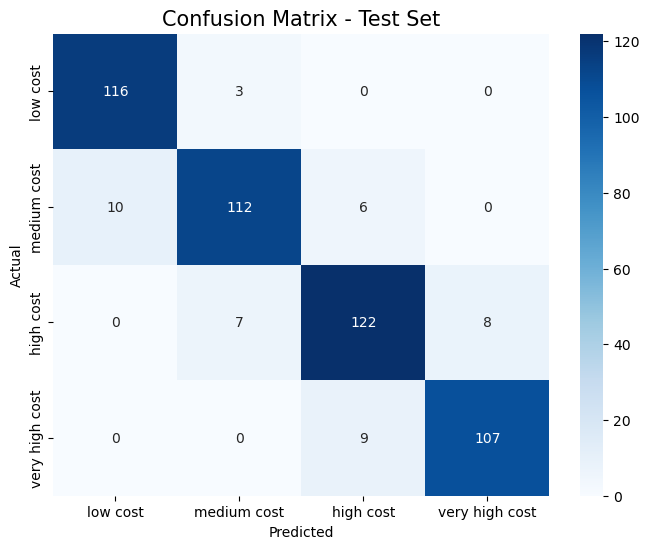

In [104]:
y_pred = SVmodel.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=Class_cat, yticklabels=Class_cat)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set', fontsize=15)
plt.show()

In [105]:
# getting classification report
print('Classification report for Support Vector classifier (for Test set) :\n', classification_report(y_test, y_pred_SV))

Classification report for Support Vector classifier (for Test set) :
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       119
           1       0.92      0.88      0.90       128
           2       0.89      0.89      0.89       137
           3       0.93      0.92      0.93       116

    accuracy                           0.91       500
   macro avg       0.91      0.92      0.91       500
weighted avg       0.91      0.91      0.91       500



SVM classifier demonstrates a good overall performance on the test set. The accuracy of 91% suggests that the model is effective in classifying instances. The precision, recall, and F1-scores for each class indicate a balanced performance across the different classes. The macro and weighted average metrics also show good overall performance. Overall, the SVM classifier appears to be a good model for this , but further optimization and tuning might be needed.

# 6.XGBoost Classifier

In [106]:
# Model Implementation
xgb = XGBClassifier(max_depth=5, learning_rate=0.1)

# Fit the Algorithm
xgb.fit(X_train, y_train)

# Predict on the model
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score
# getting train and test scores
print('Train score :\n', accuracy_score(y_train, y_pred_train_xgb))
print('Test score :\n', accuracy_score(y_test, y_pred_test_xgb),'\n')

# getting confusion matrix
print('Confusion matrix for XGBoost Classifier :\n', confusion_matrix(y_test, y_pred_test_xgb))

Train score :
 1.0
Test score :
 0.896 

Confusion matrix for XGBoost Classifier :
 [[113   6   0   0]
 [  8 109  11   0]
 [  0   9 119   9]
 [  0   0   9 107]]


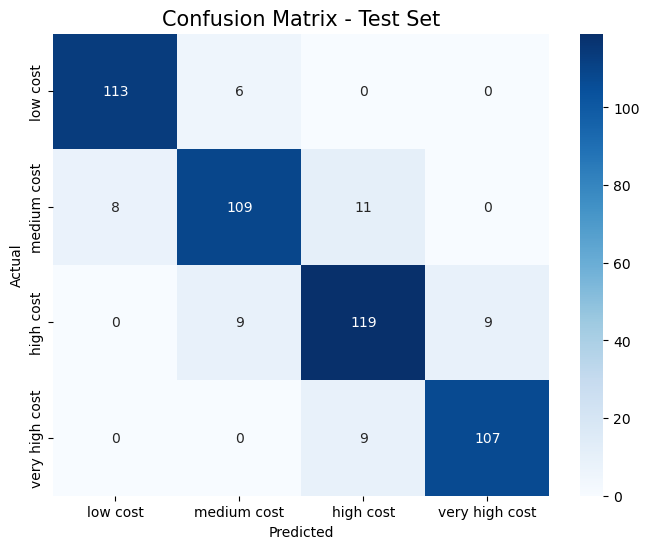

In [108]:
y_pred = xgb.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=Class_cat, yticklabels=Class_cat)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set', fontsize=15)
plt.show()

Firstly,
1. For Training : score of 1.0 indicates that the model has achieved perfect accuracy 100% on the training data, which can sometimes be a sign of overfitting.
2. For Testing : the model achieved an accuracy of 0.896 (89.6%) on the test data, which is quite good. It suggests that the model is performing well on unseen examples.

Now from the confusiion matrix it is evident that,
1. Class 0: Out of 119 instances of class 0, 113 were correctly classified, while 6 instances of class 0 were incorrectly classified as class 1.
2. Class 1: Out of 128 instances of class 1, 109 were correctly classified, however 8 instances of class 1 were incorrectly classified as class 0 and 11 instances were incorrectly classified as class 2.
3. Class 2: Out of 137 instances of class 2, 119 were correctly classified, however 9 instances of class 2 were incorrectly classified as class 1 and 9 instances were incorrectly classified as class 3.
4. Class 3: Out of 116 instances of class 3, 107 were correctly classified, while there were 9 instances of class 3 that were incorrectly classified as class 2.

In [109]:
# getting classification report
print('Classification report for XGBoost classifier (for Test set) :\n', classification_report(y_test, y_pred_test_xgb))

Classification report for XGBoost classifier (for Test set) :
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       119
           1       0.88      0.85      0.87       128
           2       0.86      0.87      0.86       137
           3       0.92      0.92      0.92       116

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



Based on the classification report, XGBoost classifier appears to be performing reasonably well with good precision, recall, and F1-scores for most classes. Also, overall accuracy of 90% suggests that it is a decent model.

#### Cross-Validation & Hyperparameter Tuning

In [110]:
# model implementation with RandomizedSearchCv
from sklearn.model_selection import RandomizedSearchCV
# defining parameters
param_xgb = {'n_estimators': range(10, 201), 'learning_rate': [1, 0.5, 0.1, 0.01, 0.001], 'max_depth': [5, 10], 'gamma': [1.5, 1.8], 'subsample': [0.3, 0.5, 0.8]}

xgb_random = RandomizedSearchCV(xgb, param_distributions=param_xgb , n_iter=100, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

# model fit
xgb_random.fit(X_train, y_train)

# predict on the model
y_pred_rxgb = xgb_random.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


I used RandomizedSearchCV cross validation optimization technique in order to tune the model for better performance as it is considered good choice when dealing with larger hyperparameter spaces or when we want to quickly get an idea of good hyperparameter settings. Also it is less prone to overfitting to the training data because it explores a random subset of the search space.

In [111]:
# getting Classification report
print('Classification report for tuned XGBoost classifier after tuning :\n', classification_report(y_test, y_pred_rxgb))

Classification report for tuned XGBoost classifier after tuning :
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       119
           1       0.89      0.91      0.90       128
           2       0.86      0.82      0.84       137
           3       0.88      0.91      0.89       116

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



Based on the classification report, it is evident that there is not much improvement, even the accuracy percentage is the same i.e. 90%. But tuned XGBoost classifier seems to be performing well, with high precision, recall, and F1-scores for most classes.

## Model Evaluation

Here I used 'confusion matrix' and 'classification report' which are not necessarily evaluation metrics themselves but rather tools for evaluating the performance of machine learning models, particularly in classification tasks.
1. Confusion Matrix: It is a table that summarizes the performance of a classification algorithm by providing information about the true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the model. While the confusion matrix itself is not a single metric, we can derive various evaluation metrics from its components, including accuracy, precision, recall, F1-score, and more. It is a valuable tool for understanding where a model is making correct and incorrect predictions.

2. Classification Report: It provides a summary of various evaluation metrics, such as precision, recall, F1-score, and support, for each class in a classification problem. It is a convenient way to assess the model's performance on a per-class basis. The classification report provides a more comprehensive view of model performance than a single metric, making it easier to identify strengths and weaknesses of the model.

### The selected Model

The obvious choice would be the tuned 'Logistic Regression' model after cross validaion and hyperparameter optimization, as this model yielded the highest accuracy result of about 93% among various models we trained, making it a suitable model for prediction.

## Conclusions from EDA

* Phones which are not having 3G don't have 4G connectivity as well.

* Phones which are not having Primary cam don't have front cam as well.

* Low price phones mostly fall under Rambin 1GB & very high cost phones fall under rambin of 3GB to 4GB.

* Adequate amount of ram should be in lower range phones too for stabilized performance of phone which can effect the brand image in a positive way.

* Very high cost phones have larger screen area & pixel area as well, resulting in better screen quality.

* Very high cost phones have larger battery size & mobile weight is lowest.

* There are many phones with no front cam through out all price ranges, atleast it should be present in all very high cost phones.


## Conclusions from Modelling



**ML Model selected for deployment: Logistic Regression**
* Simple and easy to implement: Logistic regression is a relatively simple statistical method that does not require much mathematical or statistical knowledge to use.

* Works well with small datasets: Logistic regression can work well with small datasets, which is often the case in many practical applications.

* Interpretable results: Logistic regression provides coefficients for each independent variable that can be interpreted as the change in the log odds of the dependent variable for a one-unit change in the independent variable.

* Can handle both categorical and continuous variables: Logistic regression can handle both categorical and continuous independent variables, making it a versatile method for modeling binary outcomes.

**Disadvantages of Logistic Regression:-**

* Assumes linearity: Logistic regression assumes a linear relationship between the independent variables and the log odds of the dependent variable. If this assumption is violated, the results may be inaccurate.

* Sensitive to outliers: Logistic regression can be sensitive to outliers, which can have a significant impact on the results.

